**Project Summary:**

Telco customers are leaving for newer companies. Especially phone customers. Find a driver of the churn. A copy of the report will go to executives. Include enough documentation in your final notebook that someone could work through it without you.

**Goals:**
- Find drivers for customer churn at Telco
- Construct a ML classification model that accurately predicts customer churn. 

**Process/Pipeline:**  https://trello.com/b/vOXbVcbl





In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import acquire
import explore
import env
from acquire import get_telco_data

In [106]:
#Acquire the data from the telco_churn database on the Codeup data science database server

df = get_telco_data


AttributeError: 'function' object has no attribute 'data'

In [81]:
df.shape

(7043, 24)

In [82]:
df.value_counts('contract_type_id')

contract_type_id
1    3875
3    1695
2    1473
dtype: int64

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

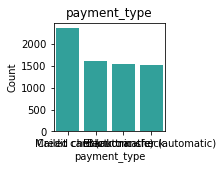

                                        payment_type  Count  Percent
Electronic check                        Mailed check   2365    33.58
Mailed check                 Credit card (automatic)   1612    22.89
Bank transfer (automatic)           Electronic check   1544    21.92
Credit card (automatic)    Bank transfer (automatic)   1522    21.61
_________________________________________________________________


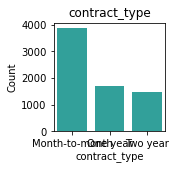

                 contract_type  Count  Percent
Month-to-month  Month-to-month   3875    55.02
Two year              One year   1695    24.07
One year              Two year   1473    20.91
_________________________________________________________________


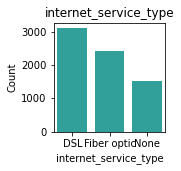

            internet_service_type  Count  Percent
Fiber optic                   DSL   3096    43.96
DSL                   Fiber optic   2421    34.37
None                         None   1526    21.67
_________________________________________________________________


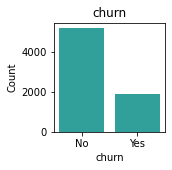

    churn  Count  Percent
No     No   5174    73.46
Yes   Yes   1869    26.54
_________________________________________________________________


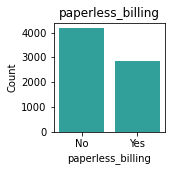

    paperless_billing  Count  Percent
Yes                No   4171    59.22
No                Yes   2872    40.78
_________________________________________________________________


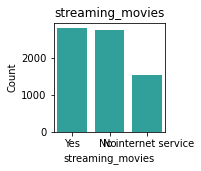

                        streaming_movies  Count  Percent
No                                   Yes   2785    39.54
Yes                                   No   2732    38.79
No internet service  No internet service   1526    21.67
_________________________________________________________________


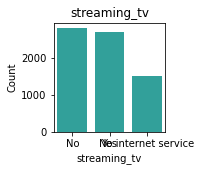

                            streaming_tv  Count  Percent
No                                    No   2810    39.90
Yes                                  Yes   2707    38.44
No internet service  No internet service   1526    21.67
_________________________________________________________________


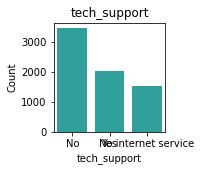

                            tech_support  Count  Percent
No                                    No   3473    49.31
Yes                                  Yes   2044    29.02
No internet service  No internet service   1526    21.67
_________________________________________________________________


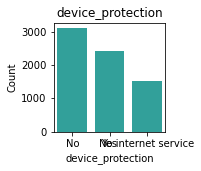

                       device_protection  Count  Percent
No                                    No   3095    43.94
Yes                                  Yes   2422    34.39
No internet service  No internet service   1526    21.67
_________________________________________________________________


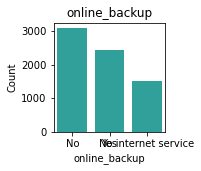

                           online_backup  Count  Percent
No                                    No   3088    43.84
Yes                                  Yes   2429    34.49
No internet service  No internet service   1526    21.67
_________________________________________________________________


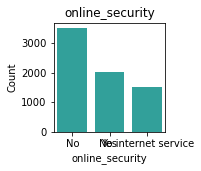

                         online_security  Count  Percent
No                                    No   3498    49.67
Yes                                  Yes   2019    28.67
No internet service  No internet service   1526    21.67
_________________________________________________________________


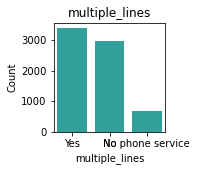

                    multiple_lines  Count  Percent
No                             Yes   3390    48.13
Yes                             No   2971    42.18
No phone service  No phone service    682     9.68
_________________________________________________________________


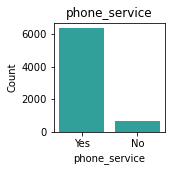

    phone_service  Count  Percent
Yes           Yes   6361    90.32
No             No    682     9.68
_________________________________________________________________


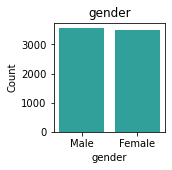

        gender  Count  Percent
Male      Male   3555    50.48
Female  Female   3488    49.52
_________________________________________________________________


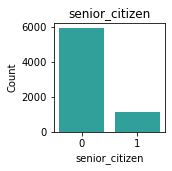

   senior_citizen  Count  Percent
0               0   5901    83.79
1               1   1142    16.21
_________________________________________________________________


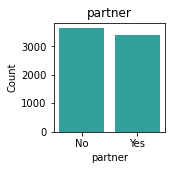

    partner  Count  Percent
No       No   3641     51.7
Yes     Yes   3402     48.3
_________________________________________________________________


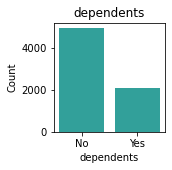

    dependents  Count  Percent
No          No   4933    70.04
Yes        Yes   2110    29.96
_________________________________________________________________


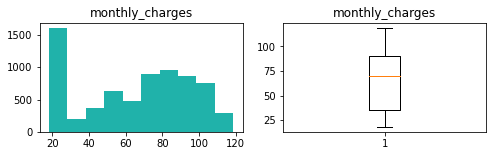

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64


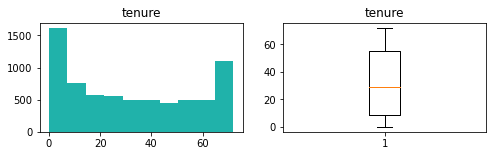

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


In [99]:
# Visualizations of individual columns
cat_vars = ['payment_type','contract_type','internet_service_type','churn',
            'paperless_billing','streaming_movies','streaming_tv','tech_support',
            'device_protection','online_backup','online_security','multiple_lines',
            'phone_service', 'gender','senior_citizen','partner','dependents']
quant_vars = ['monthly_charges','tenure']
explore.explore_univariate(df, cat_vars, quant_vars)

## Takeaways:  
Duplicate information (delete these columns): 
- payment_type_id  
- contract_type_id
- internet_service_type_id 
    
Categorical that are dtype 'object' (need to be encoded):
- gender, partner, dependants, phone_service, multiple_lines, online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies, paperless_billing

Missing values:
- total_charges has 11 missing values
- these missing values are customers with zero tenure, so can replace with zero

Change data type:
- total_charges is object and should be changed to float64

Consider combining these columns and making dummies
- combine: 

In [78]:

df.loc[df.isnull(),'value_is_NaN'] = 'Yes'
df.loc[df.notnull(), 'value_is_NaN'] = 'No'
count_nan = df.loc[df['value_is_NaN']=='Yes'].count()
print (count_nan)

KeyError: "None of [Index([                                             ('p', 'a', 'y', 'm', 'e', 'n', 't', '_', 't', 'y', 'p', 'e', '_', 'i', 'd'),\n                                               ('c', 'o', 'n', 't', 'r', 'a', 'c', 't', '_', 't', 'y', 'p', 'e', '_', 'i', 'd'),\n       ('i', 'n', 't', 'e', 'r', 'n', 'e', 't', '_', 's', 'e', 'r', 'v', 'i', 'c', 'e', '_', 't', 'y', 'p', 'e', '_', 'i', 'd'),\n                                                                        ('c', 'u', 's', 't', 'o', 'm', 'e', 'r', '_', 'i', 'd'),\n                                                                                                 ('g', 'e', 'n', 'd', 'e', 'r'),\n                                                         ('s', 'e', 'n', 'i', 'o', 'r', '_', 'c', 'i', 't', 'i', 'z', 'e', 'n'),\n                                                                                            ('p', 'a', 'r', 't', 'n', 'e', 'r'),\n                                                                             ('d', 'e', 'p', 'e', 'n', 'd', 'e', 'n', 't', 's'),\n                                                                                                 ('t', 'e', 'n', 'u', 'r', 'e'),\n                                                              ('p', 'h', 'o', 'n', 'e', '_', 's', 'e', 'r', 'v', 'i', 'c', 'e'),\n                                                         ('m', 'u', 'l', 't', 'i', 'p', 'l', 'e', '_', 'l', 'i', 'n', 'e', 's'),\n                                                    ('o', 'n', 'l', 'i', 'n', 'e', '_', 's', 'e', 'c', 'u', 'r', 'i', 't', 'y'),\n                                                              ('o', 'n', 'l', 'i', 'n', 'e', '_', 'b', 'a', 'c', 'k', 'u', 'p'),\n                                          ('d', 'e', 'v', 'i', 'c', 'e', '_', 'p', 'r', 'o', 't', 'e', 'c', 't', 'i', 'o', 'n'),\n                                                                   ('t', 'e', 'c', 'h', '_', 's', 'u', 'p', 'p', 'o', 'r', 't'),\n                                                                   ('s', 't', 'r', 'e', 'a', 'm', 'i', 'n', 'g', '_', 't', 'v'),\n                                               ('s', 't', 'r', 'e', 'a', 'm', 'i', 'n', 'g', '_', 'm', 'o', 'v', 'i', 'e', 's'),\n                                          ('p', 'a', 'p', 'e', 'r', 'l', 'e', 's', 's', '_', 'b', 'i', 'l', 'l', 'i', 'n', 'g'),\n                                                    ('m', 'o', 'n', 't', 'h', 'l', 'y', '_', 'c', 'h', 'a', 'r', 'g', 'e', 's'),\n                                                              ('t', 'o', 't', 'a', 'l', '_', 'c', 'h', 'a', 'r', 'g', 'e', 's'),\n                                                                                                      ('c', 'h', 'u', 'r', 'n'),\n                      ('i', 'n', 't', 'e', 'r', 'n', 'e', 't', '_', 's', 'e', 'r', 'v', 'i', 'c', 'e', '_', 't', 'y', 'p', 'e'),\n                                                              ('c', 'o', 'n', 't', 'r', 'a', 'c', 't', '_', 't', 'y', 'p', 'e'),\n                                                                   ('p', 'a', 'y', 'm', 'e', 'n', 't', '_', 't', 'y', 'p', 'e'),\n                                                                   ('v', 'a', 'l', 'u', 'e', '_', 'i', 's', '_', 'N', 'a', 'N')],\n      dtype='object')] are in the [index]"